# Will they survive? -The Titanic

Importing dependancies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
plt.style.use("dark_background")


Reading the training data

In [4]:
data=pd.read_csv("train.csv")

In [5]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Doing feature engineering at early stage.

In [6]:
data["Family"]=data["SibSp"]+data["Parch"]

Feature Extraction - Columns such as passenger id , name ,etc are not logically related to a person surviving so i can remove them and only take forward better features

In [7]:
data=data[["Pclass","Sex","Age","Fare","Embarked","Survived","Family"]]

Getting over view "THE BIG PICTURE" of the data

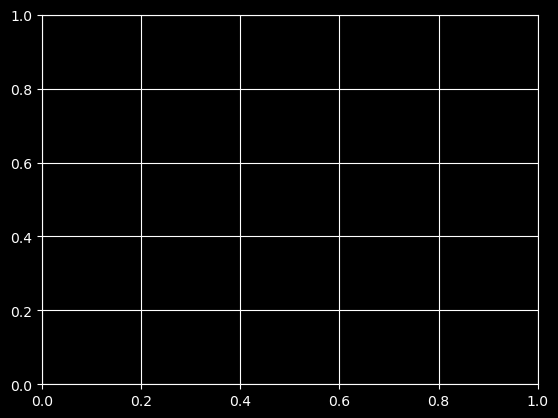

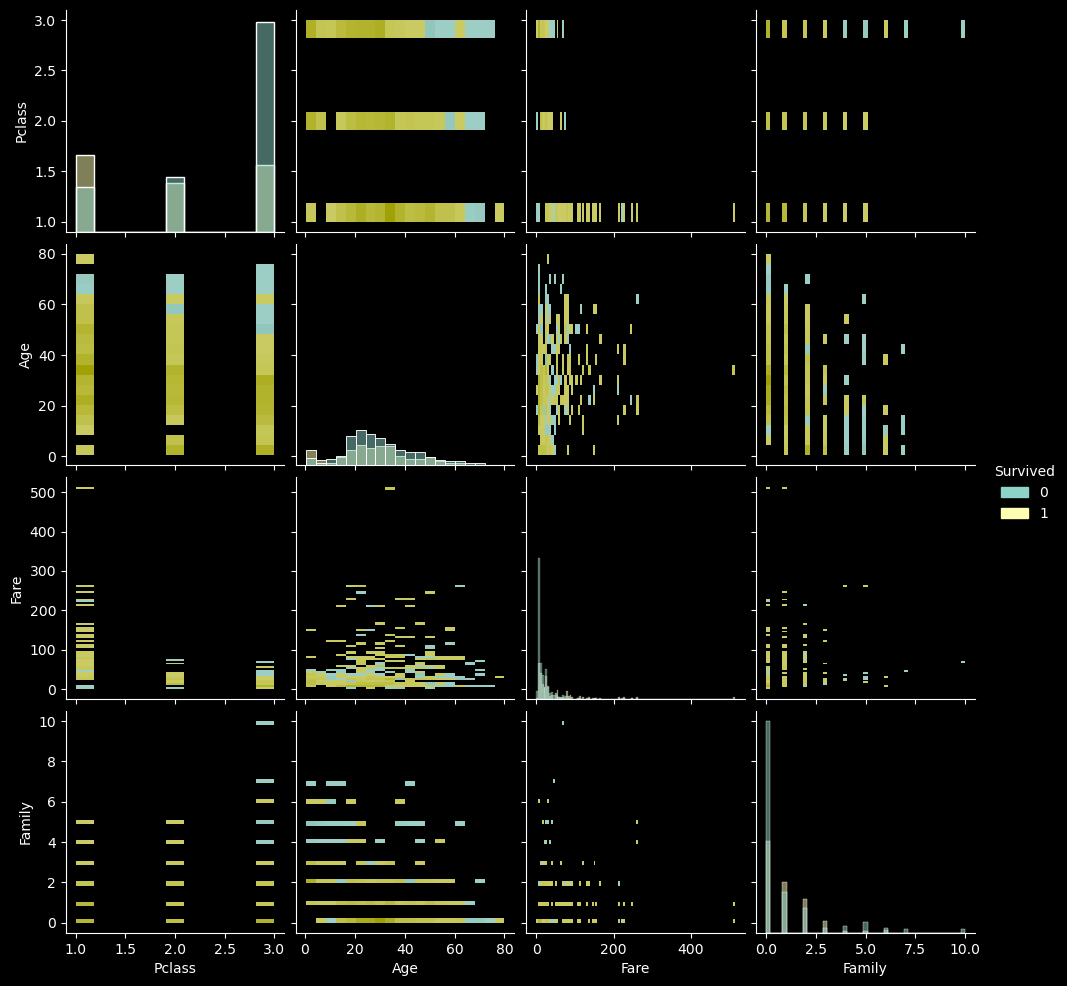

In [8]:
plt.grid(True)
sns.pairplot(data,hue="Survived",kind="hist")

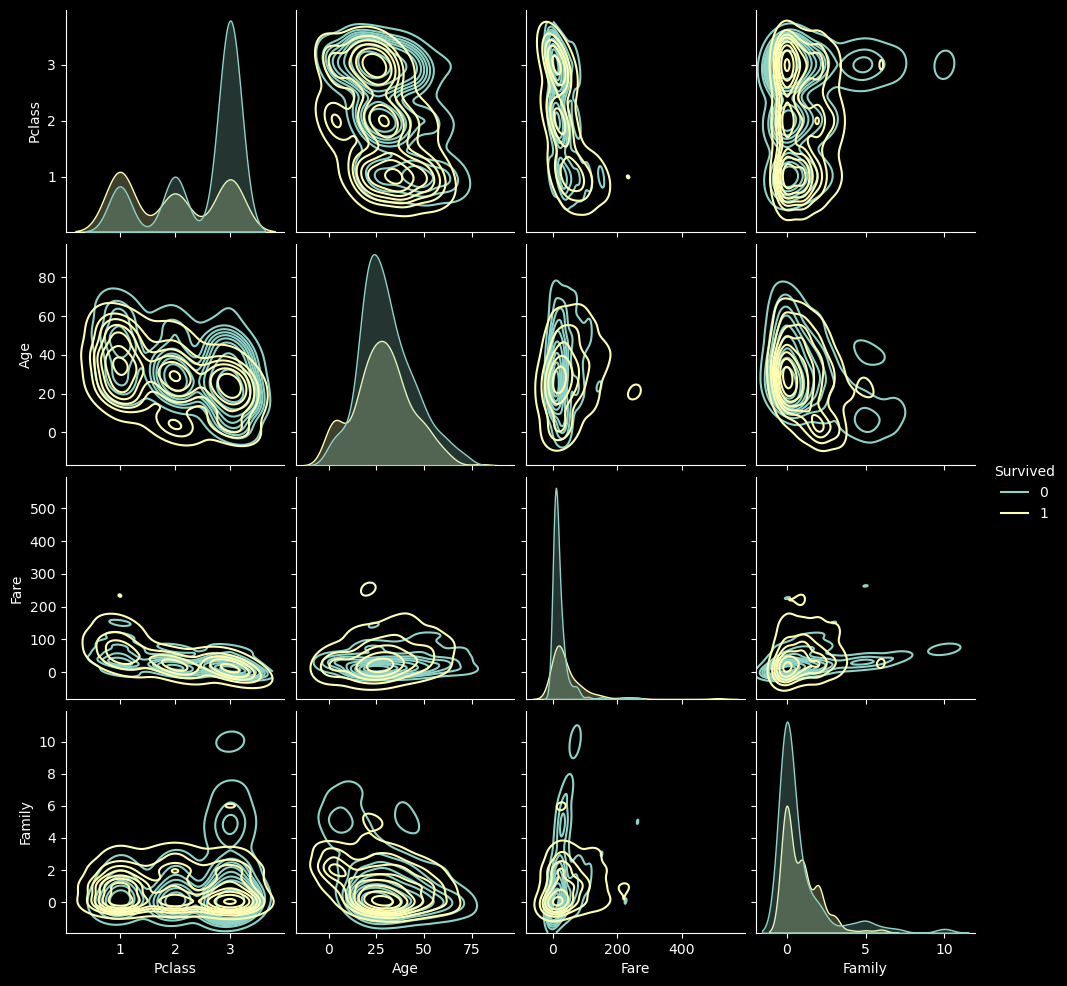

In [9]:
sns.pairplot(data,hue="Survived",kind="kde")

The big picture? ==>Family ,fare graphs seems left skewed
                    Age is somewhat nornal
                    Pclass has right skewed graph
                    
                    Density is more towards older and Pclass=3 i.e wealthier people , maybe if older people were let first

Analysising Basic stats 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Fare      891 non-null    float64
 4   Embarked  889 non-null    object 
 5   Survived  891 non-null    int64  
 6   Family    891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [11]:
data.describe()

,Pclass,Age,Fare,Survived,Family
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208,0.383838,0.904602
std,0.836071,14.526497,49.693429,0.486592,1.613459
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,7.910400,0.000000,0.000000
50%,3.000000,28.000000,14.454200,0.000000,0.000000
75%,3.000000,38.000000,31.000000,1.000000,1.000000
max,3.000000,80.000000,512.329200,1.000000,10.000000


In [12]:
data.nunique()

Pclass        3
Sex           2
Age          88
Fare        248
Embarked      3
Survived      2
Family        9
dtype: int64

In [13]:
data.isna().sum()

Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
Survived      0
Family        0
dtype: int64

In [14]:
print("unique values in Pclass : ",data["Pclass"].unique())
print("unique values in Sex : ",data["Sex"].unique())
print("unique values in Embarked : ",data["Embarked"].unique())
print("unique values in Age : ",data["Age"].unique())
print("\n\nunique values in Fare : ",data["Fare"].unique())
print("\n\nunique values in Family : ",data["Family"].unique())

unique values in Pclass :  [3 1 2]
unique values in Sex :  ['male' 'female']
unique values in Embarked :  ['S' 'C' 'Q' nan]
unique values in Age :  [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]


unique values in Fare :  [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.

Some instincts : "Family" column is ordinal category and thus already ready
                 "Pclass" column is ordinal category and thus already ready
                 "Sex" has male and female nominal category and world later need encoding - LabelEncoding
                 "Fare" is numerical if wanted we can use standard scaler on it later
                 "Embarked" is also a nomial category similar to "sex" - LAbelEncoding needed later
                 "Age" is a numerical column but we can group it into bins to get better results thus convert it into ordinal                     category

In [15]:
data.isnull().sum()

Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
Survived      0
Family        0
dtype: int64

In [16]:
data[data["Embarked"].isna()]

,Pclass,Sex,Age,Fare,Embarked,Survived,Family
61,1,female,38.0,80.0,NaN,1,0
829,1,female,62.0,80.0,NaN,1,0


Only 2 nan values in Embarked column i shall replace them with mode a

In [17]:
print(data["Embarked"].mode()[0])
mode_of_embarked=data["Embarked"].mode()[0]
data["Embarked"]=data["Embarked"].fillna(data["Embarked"].mode()[0])
print(data.isna().sum())

S
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      0
Survived      0
Family        0
dtype: int64


#Grouping age column (bining after analysis)

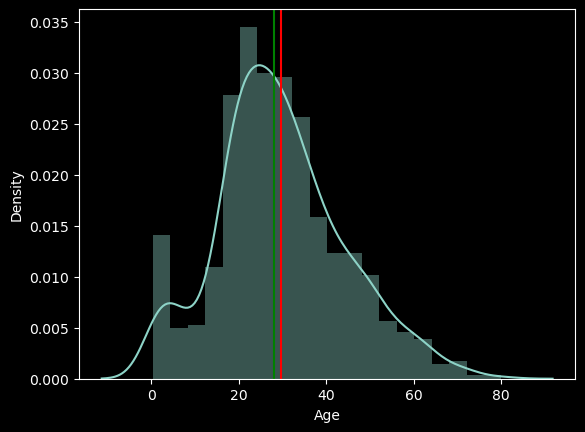

In [18]:
sns.distplot(data["Age"])
plt.axvline(data["Age"].mean(),color='r')
plt.axvline(data["Age"].median(),color='g')

Data in age column is near normal

In [19]:
data["Age"].skew()

0.38910778230082704

Since the distribution is normal we can simply replace missing values by the mean.

In [20]:
mean_of_age=data["Age"].mean()
data["Age"]=data["Age"].fillna(data["Age"].mean())
data.isna().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Survived    0
Family      0
dtype: int64

In [21]:
#A simple if - elif - else utility function for bining into groups after analysis
def func(x):
    if(x<=10):
        return "child";
    elif(x<20):
        return "teen";
    elif(x<30):
        return "young1";
    elif(x<40):
        return "young2";
    elif (x<50):
        return "old1";
    elif(x<60):
        return "old2";
    elif(x<70):
        return "old3";
    else:
        return "very_old"
data["Age"]=data["Age"].apply(func)

In [22]:
data["Age"].unique()

array(['young1', 'young2', 'old2', 'child', 'teen', 'old1', 'old3',
       'very_old'], dtype=object)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    object 
 3   Fare      891 non-null    float64
 4   Embarked  891 non-null    object 
 5   Survived  891 non-null    int64  
 6   Family    891 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 48.9+ KB


Checking the bar plot for different age groups

<Axes: xlabel='Age', ylabel='Count'>

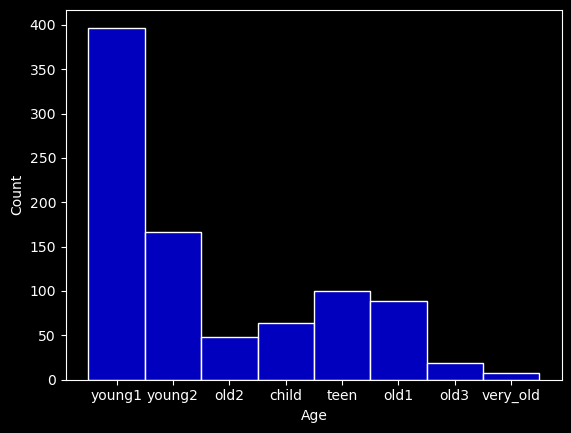

In [24]:
sns.histplot(data["Age"],color='b')

Young people are are more ,
we see as age grows after young the people travelled less and at very_old it is closing to zero.

Even teens have good proportion of counts.

<Axes: ylabel='Frequency'>

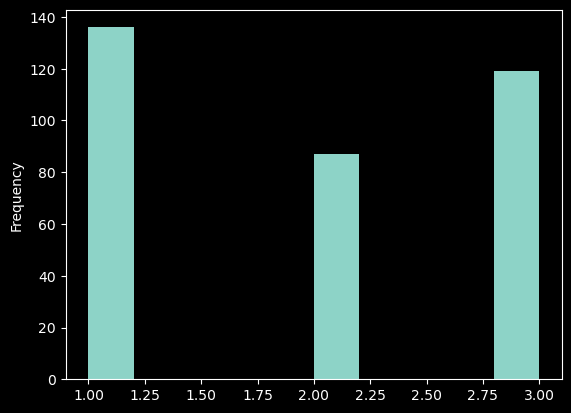

In [25]:
data[data["Survived"]==1]["Pclass"].plot(kind="hist")

Lets work on "Fare"

First of all analysing its distribution

<Axes: xlabel='Fare', ylabel='Density'>

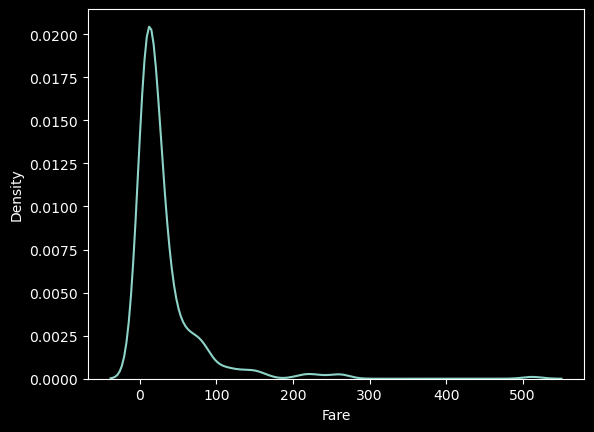

In [26]:
sns.kdeplot(data["Fare"])

In [27]:
data[["Fare"]].skew()

Fare    4.787317
dtype: float64

It seem to be highly skewed !

Does it has outliers!? -> Checking by plotting Box Plot

{'whiskers': [<matplotlib.lines.Line2D at 0x1e9a1d2bd10>,
 'caps': [<matplotlib.lines.Line2D at 0x1e99f18af10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e9a1d2fdd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e99802c3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e99f11bb50>],
 'means': []}

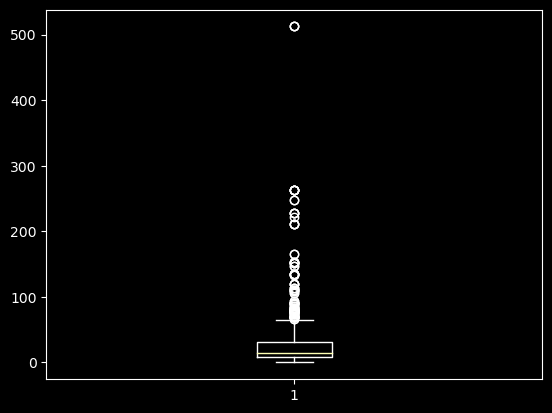

In [29]:
plt.boxplot(data["Fare"])

Yes there are outliers!

Getting its 5 mean summery -> Not enoung -> Getting deeper.

In [32]:
q1=np.percentile(data["Fare"],0)
#q1_5=np.percentile(data["Fare"],12.5)
q2=np.percentile(data["Fare"],25)
q3=np.percentile(data["Fare"],50)
q4=np.percentile(data["Fare"],75)
#q4_5=np.percentile(data["Fare"],87.5)
q5=np.percentile(data["Fare"],100)
#print(q1," ",q1_5," ",q2," ",q3," ",q4," ",q4_5, " ",q5)

In [33]:
#q=np.percentile(data["Fare"],90)
#q

I have to handle outliers->but I saw distribution as skewed-> we thus use zscore to cap the outliers insead of removing.
I have chosen the boundary values by analysing above percentiles so the graph does not get worse.

In [34]:
std=data["Fare"].std()
mean=data["Fare"].mean()
print(std," ",mean)
def trans(x):
    z_score=((x-mean)/std)
    if(z_score>3):
        return 100
    elif(z_score<-3):
        return 7.5
    else:
        return x
data["Fare"]=data["Fare"].apply(trans)

49.693428597180905   32.204207968574636


Now I again (and again) check if the graph is not disturbed . 

<Axes: xlabel='Fare', ylabel='Density'>

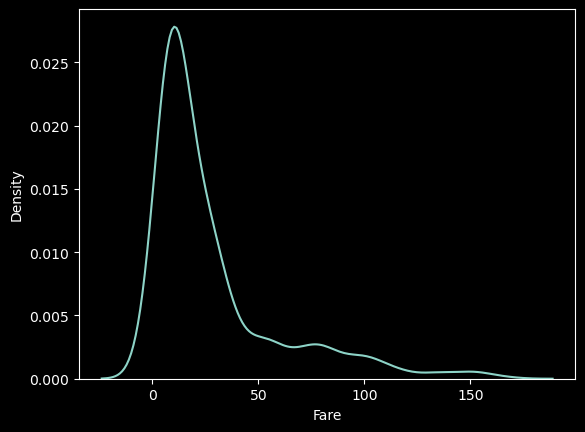

In [35]:
sns.kdeplot(data["Fare"])

In [36]:
data["Fare"].max()

164.8667

Early stage heatmap-> if I have some very inter related columns(among themselves other than to the target "Survival" column) : I have to remove one of them and if very related to "Survival" ->Nice!,proceed.

<Axes: >

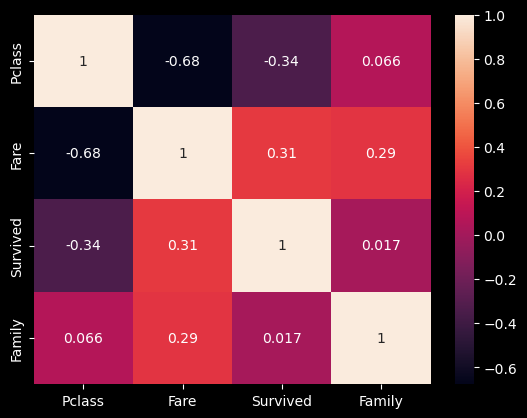

In [37]:
sns.heatmap(data.corr(),annot=True)


The heatmap also helped to find association ->Pclass has significant relation to Fare column -> why not! better room facility->more expense! 

Trying to exploring the data more...

In [38]:
data.groupby("Pclass").describe().T

Pclass                   1           2           3
Fare     count  216.000000  184.000000  491.000000
         mean    67.552044   20.662183   13.675550
         std     37.700268   13.417399   11.778142
         min      0.000000    0.000000    0.000000
         25%     30.923950   13.000000    7.750000
         50%     60.287500   14.250000    8.050000
         75%     93.500000   26.000000   15.500000
         max    164.866700   73.500000   69.550000
Survived count  216.000000  184.000000  491.000000
         mean     0.629630    0.472826    0.242363
         std      0.484026    0.500623    0.428949
         min      0.000000    0.000000    0.000000
         25%      0.000000    0.000000    0.000000
         50%      1.000000    0.000000    0.000000
         75%      1.000000    1.000000    0.000000
         max      1.000000    1.000000    1.000000
Family   count  216.000000  184.000000  491.000000
         mean     0.773148    0.782609    1.008147
         std      1.038524    1.054017    1.953525
         min      0.000000    0.000000    0.000000
         25%      0.000000    0.000000    0.000000
         50%      0.000000    0.000000    0.000000
         75%      1.000000    1.250000    1.000000
         max      5.000000    5.000000   10.000000

In [39]:
#Comparing Fare
print(data.groupby("Pclass")["Fare"].mean())
print(data.groupby("Survived")["Fare"].mean())
print(data.groupby("Age")["Fare"].mean())
print(data.groupby("Sex")["Fare"].mean())
print(data.groupby("Embarked")["Fare"].mean())

Pclass
1    67.552044
2    20.662183
3    13.675550
Name: Fare, dtype: float64
Survived
0    20.598169
1    40.349075
Name: Fare, dtype: float64
Age
child       30.434439
old1        35.318448
old2        44.859983
old3        39.788595
teen        27.022960
very_old    30.169057
young1      22.205025
young2      32.206560
Name: Fare, dtype: float64
Sex
female    38.342278
male      22.648706
Name: Fare, dtype: float64
Embarked
C    45.201887
Q    13.276030
S    25.528804
Name: Fare, dtype: float64


fare for Pclass 1 > Pclass 2 > Pclass3

Many more instincts here but for now we have enough,proceeding.

Splitting the data into training data and testing data from the train.csv itself->because the test.csv has no survival column for evaluation! 

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x=data.drop(columns=["Survived"])
x

,Pclass,Sex,Age,Fare,Embarked,Family
0,3,male,young1,7.2500,S,1
1,1,female,young2,71.2833,C,1
2,3,female,young1,7.9250,S,0
3,1,female,young2,53.1000,S,1
4,3,male,young2,8.0500,S,0
...,...,...,...,...,...,...
886,2,male,young1,13.0000,S,0
887,1,female,teen,30.0000,S,0
888,3,female,young1,23.4500,S,3
889,1,male,young1,30.0000,C,0


In [42]:
y=data[["Survived"]]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [43]:
stratify=data["Survived"]       #==>For better distribution between training and testing data

In [44]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,stratify=data["Survived"],test_size=0.2,random_state=42)

In [45]:
xtrain

,Pclass,Sex,Age,Fare,Embarked,Family
692,3,male,young1,56.4958,S,0
481,2,male,young1,0.0000,S,0
527,1,male,young1,100.0000,S,0
855,3,female,teen,9.3500,S,1
801,2,female,young2,26.2500,S,2
...,...,...,...,...,...,...
359,3,female,young1,7.8792,Q,0
258,1,female,young2,100.0000,C,0
736,3,female,old1,34.3750,S,4
462,1,male,old1,38.5000,S,0


In [46]:
xtest

,Pclass,Sex,Age,Fare,Embarked,Family
565,3,male,young1,24.1500,S,2
160,3,male,old1,16.1000,S,1
553,3,male,young1,7.2250,C,0
860,3,male,old1,14.1083,S,2
241,3,female,young1,15.5000,Q,1
...,...,...,...,...,...,...
880,2,female,young1,26.0000,S,1
91,3,male,young1,7.8542,S,0
883,2,male,young1,10.5000,S,0
473,2,female,young1,13.7917,C,0


In [47]:
ytrain

,Survived
692,1
481,0
527,0
855,1
801,1
...,...
359,1
258,1
736,0
462,0


Now I do encoding on categorical data.

In [48]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [49]:
ohe=OneHotEncoder(drop='first')

In [50]:
result=ohe.fit_transform(xtrain[["Embarked","Sex"]])

In [51]:
result.toarray().shape

(712, 3)

In [52]:
ohe.get_feature_names_out()

array(['Embarked_Q', 'Embarked_S', 'Sex_male'], dtype=object)

In [53]:
encoded=pd.DataFrame(result.toarray(),columns=ohe.get_feature_names_out())

In [54]:
#do not forget to reset index otherwise will get missing values why -> because the index is changed while train test split and
#concat will thus give wrong result
xtrain=pd.concat([xtrain.reset_index(),encoded],axis=1)
xtrain=xtrain.drop(columns=["index","Sex","Embarked"],axis=1)
xtrain

,Pclass,Age,Fare,Family,Embarked_Q,Embarked_S,Sex_male
0,3,young1,56.4958,0,0.0,1.0,1.0
1,2,young1,0.0000,0,0.0,1.0,1.0
2,1,young1,100.0000,0,0.0,1.0,1.0
3,3,teen,9.3500,1,0.0,1.0,0.0
4,2,young2,26.2500,2,0.0,1.0,0.0
...,...,...,...,...,...,...,...
707,3,young1,7.8792,0,1.0,0.0,0.0
708,1,young2,100.0000,0,0.0,0.0,0.0
709,3,old1,34.3750,4,0.0,1.0,0.0
710,1,old1,38.5000,0,0.0,1.0,1.0


In [55]:
xtrain.isna().sum()

Pclass        0
Age           0
Fare          0
Family        0
Embarked_Q    0
Embarked_S    0
Sex_male      0
dtype: int64

In [56]:
xtest

,Pclass,Sex,Age,Fare,Embarked,Family
565,3,male,young1,24.1500,S,2
160,3,male,old1,16.1000,S,1
553,3,male,young1,7.2250,C,0
860,3,male,old1,14.1083,S,2
241,3,female,young1,15.5000,Q,1
...,...,...,...,...,...,...
880,2,female,young1,26.0000,S,1
91,3,male,young1,7.8542,S,0
883,2,male,young1,10.5000,S,0
473,2,female,young1,13.7917,C,0


In [57]:
result2=ohe.transform(xtest[["Embarked","Sex"]])
xtest=pd.concat([xtest.reset_index(),pd.DataFrame(result2.toarray(),columns=ohe.get_feature_names_out())],axis=1)
xtest=xtest.drop(columns=["index","Sex","Embarked"],axis=1)
xtest

,Pclass,Age,Fare,Family,Embarked_Q,Embarked_S,Sex_male
0,3,young1,24.1500,2,0.0,1.0,1.0
1,3,old1,16.1000,1,0.0,1.0,1.0
2,3,young1,7.2250,0,0.0,0.0,1.0
3,3,old1,14.1083,2,0.0,1.0,1.0
4,3,young1,15.5000,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...
174,2,young1,26.0000,1,0.0,1.0,0.0
175,3,young1,7.8542,0,0.0,1.0,1.0
176,2,young1,10.5000,0,0.0,1.0,1.0
177,2,young1,13.7917,0,0.0,0.0,0.0


In [58]:
oe=OrdinalEncoder(categories=[['child', 'teen','young1', 'young2', 'old1', 'old2','old3','very_old']])

In [59]:
xtrain["Age"]=oe.fit_transform(xtrain[["Age"]])

In [60]:
xtrain

,Pclass,Age,Fare,Family,Embarked_Q,Embarked_S,Sex_male
0,3,2.0,56.4958,0,0.0,1.0,1.0
1,2,2.0,0.0000,0,0.0,1.0,1.0
2,1,2.0,100.0000,0,0.0,1.0,1.0
3,3,1.0,9.3500,1,0.0,1.0,0.0
4,2,3.0,26.2500,2,0.0,1.0,0.0
...,...,...,...,...,...,...,...
707,3,2.0,7.8792,0,1.0,0.0,0.0
708,1,3.0,100.0000,0,0.0,0.0,0.0
709,3,4.0,34.3750,4,0.0,1.0,0.0
710,1,4.0,38.5000,0,0.0,1.0,1.0


In [61]:
xtest["Age"]=oe.transform(xtest[['Age']])
xtest

,Pclass,Age,Fare,Family,Embarked_Q,Embarked_S,Sex_male
0,3,2.0,24.1500,2,0.0,1.0,1.0
1,3,4.0,16.1000,1,0.0,1.0,1.0
2,3,2.0,7.2250,0,0.0,0.0,1.0
3,3,4.0,14.1083,2,0.0,1.0,1.0
4,3,2.0,15.5000,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...
174,2,2.0,26.0000,1,0.0,1.0,0.0
175,3,2.0,7.8542,0,0.0,1.0,1.0
176,2,2.0,10.5000,0,0.0,1.0,1.0
177,2,2.0,13.7917,0,0.0,0.0,0.0


I have used standartscaler below to scale the numerical column "Fare"

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
sc=StandardScaler()

In [64]:
xtrain["Fare"]=sc.fit_transform(xtrain[["Fare"]])
xtrain

,Pclass,Age,Fare,Family,Embarked_Q,Embarked_S,Sex_male
0,3,2.0,0.900976,0,0.0,1.0,1.0
1,2,2.0,-0.898266,0,0.0,1.0,1.0
2,1,2.0,2.286469,0,0.0,1.0,1.0
3,3,1.0,-0.600493,1,0.0,1.0,0.0
4,2,3.0,-0.062273,2,0.0,1.0,0.0
...,...,...,...,...,...,...,...
707,3,2.0,-0.647334,0,1.0,0.0,0.0
708,1,3.0,2.286469,0,0.0,0.0,0.0
709,3,4.0,0.196487,4,0.0,1.0,0.0
710,1,4.0,0.327857,0,0.0,1.0,1.0


In [65]:
xtest["Fare"]=sc.transform(xtest[["Fare"]])
xtest

,Pclass,Age,Fare,Family,Embarked_Q,Embarked_S,Sex_male
0,3,2.0,-0.129152,2,0.0,1.0,1.0
1,3,4.0,-0.385523,1,0.0,1.0,1.0
2,3,2.0,-0.668169,0,0.0,0.0,1.0
3,3,4.0,-0.448954,2,0.0,1.0,1.0
4,3,2.0,-0.404632,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...
174,2,2.0,-0.070235,1,0.0,1.0,0.0
175,3,2.0,-0.648130,0,0.0,1.0,1.0
176,2,2.0,-0.563869,0,0.0,1.0,1.0
177,2,2.0,-0.459037,0,0.0,0.0,0.0


Drawing heatmap again to see if i find something more interesting since after encoding i have more columns

<Axes: >

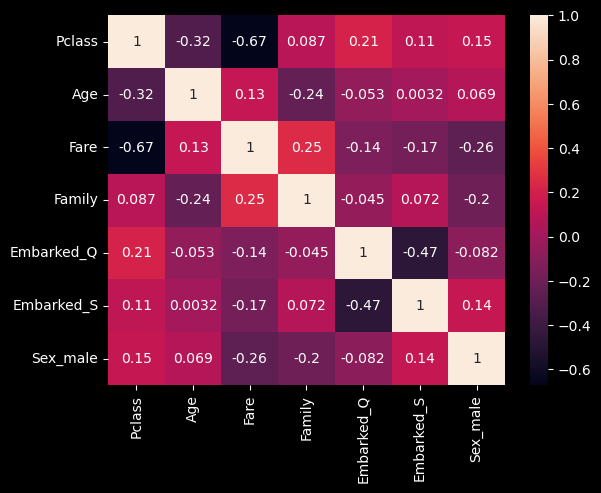

In [66]:
sns.heatmap(xtrain.corr(),annot=True)

Proceeding with Model training and evaluation

In [67]:
from sklearn.model_selection import cross_val_score 

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [71]:
x_pred=lr.predict(xtrain)

In [72]:
from sklearn.metrics import accuracy_score

In [73]:
accuracy_score(ytrain,x_pred)

0.7921348314606742

In [74]:
accuracy_score(ytest,lr.predict(xtest))

0.8044692737430168

In [75]:
cs=cross_val_score(LogisticRegression(),xtest,ytest,cv=5)
print(cs.mean())

0.7711111111111111


In [76]:
from sklearn.svm import SVC
svc=SVC(kernel="rbf")
svc.fit(xtrain,ytrain)
x_pred=svc.predict(xtrain)
print("training accuracy",accuracy_score(ytrain,x_pred))
print("test accuracy",accuracy_score(ytest,svc.predict(xtest)))
print("mean cross val score",cross_val_score(SVC(),xtest,ytest,cv=5).mean())

training accuracy 0.8286516853932584
test accuracy 0.8268156424581006
mean cross val score 0.7653968253968254


In [77]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5,weights="distance")
model.fit(xtrain,ytrain)
x_pred=model.predict(xtrain)
print("training accuracy",accuracy_score(ytrain,x_pred))
print("test accuracy",accuracy_score(ytest,model.predict(xtest)))
print("mean cross val score",cross_val_score(model,xtest,ytest,cv=5).mean())

training accuracy 0.9508426966292135
test accuracy 0.7821229050279329
mean cross val score 0.7647619047619048


In [78]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=6,)
model.fit(xtrain,ytrain)
x_pred=model.predict(xtrain)
print("training accuracy",accuracy_score(ytrain,x_pred))
print("test accuracy",accuracy_score(ytest,model.predict(xtest)))
print("mean cross val score",cross_val_score(model,xtest,ytest,cv=5).mean())

training accuracy 0.875
test accuracy 0.8212290502793296
mean cross val score 0.7655555555555555


In [79]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(xtrain,ytrain)
x_pred=model.predict(xtrain)
print("training accuracy",accuracy_score(ytrain,x_pred))
print("test accuracy",accuracy_score(ytest,model.predict(xtest)))
print("mean cross val score",cross_val_score(model,xtest,ytest,cv=5).mean())

training accuracy 0.7879213483146067
test accuracy 0.770949720670391
mean cross val score 0.7485714285714287


In [80]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=89)
model.fit(xtrain,ytrain)
x_pred=model.predict(xtrain)
print("training accuracy",accuracy_score(ytrain,x_pred))
print("test accuracy",accuracy_score(ytest,model.predict(xtest)))
print("mean cross val score",cross_val_score(model,xtest,ytest,cv=5).mean())

training accuracy 0.9508426966292135
test accuracy 0.7486033519553073
mean cross val score 0.7823809523809524


In [81]:
a=pd.concat([xtrain.reset_index(),ytrain.reset_index()],axis=1).drop("index",axis=1)
a

,Pclass,Age,Fare,Family,Embarked_Q,Embarked_S,Sex_male,Survived
0,3,2.0,0.900976,0,0.0,1.0,1.0,1
1,2,2.0,-0.898266,0,0.0,1.0,1.0,0
2,1,2.0,2.286469,0,0.0,1.0,1.0,0
3,3,1.0,-0.600493,1,0.0,1.0,0.0,1
4,2,3.0,-0.062273,2,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...
707,3,2.0,-0.647334,0,1.0,0.0,0.0,1
708,1,3.0,2.286469,0,0.0,0.0,0.0,1
709,3,4.0,0.196487,4,0.0,1.0,0.0,0
710,1,4.0,0.327857,0,0.0,1.0,1.0,0


In [82]:
b=pd.concat([xtest.reset_index(),ytest.reset_index()],axis=1).drop("index",axis=1)
b

,Pclass,Age,Fare,Family,Embarked_Q,Embarked_S,Sex_male,Survived
0,3,2.0,-0.129152,2,0.0,1.0,1.0,0
1,3,4.0,-0.385523,1,0.0,1.0,1.0,0
2,3,2.0,-0.668169,0,0.0,0.0,1.0,1
3,3,4.0,-0.448954,2,0.0,1.0,1.0,0
4,3,2.0,-0.404632,1,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...
174,2,2.0,-0.070235,1,0.0,1.0,0.0,1
175,3,2.0,-0.648130,0,0.0,1.0,1.0,0
176,2,2.0,-0.563869,0,0.0,1.0,1.0,0
177,2,2.0,-0.459037,0,0.0,0.0,0.0,1


In [83]:
c=pd.concat([a.reset_index(),b.reset_index()],axis=0).drop(columns=["index"])
c

,Pclass,Age,Fare,Family,Embarked_Q,Embarked_S,Sex_male,Survived
0,3,2.0,0.900976,0,0.0,1.0,1.0,1
1,2,2.0,-0.898266,0,0.0,1.0,1.0,0
2,1,2.0,2.286469,0,0.0,1.0,1.0,0
3,3,1.0,-0.600493,1,0.0,1.0,0.0,1
4,2,3.0,-0.062273,2,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...
174,2,2.0,-0.070235,1,0.0,1.0,0.0,1
175,3,2.0,-0.648130,0,0.0,1.0,1.0,0
176,2,2.0,-0.563869,0,0.0,1.0,1.0,0
177,2,2.0,-0.459037,0,0.0,0.0,0.0,1


In [84]:
model.fit(c.drop(columns=["Survived"]),c["Survived"] )

RandomForestClassifier(n_estimators=89)

# Now doing the same steps for test.csv ->The actual problem solution from our created problem best solutions

In [85]:
df=pd.read_csv("test.csv",usecols=["Pclass","Sex","Age","Fare","Embarked","SibSp","Parch","PassengerId"])

In [86]:
df["Family"]=df["SibSp"]+df["Parch"]

In [87]:
df=df.drop(columns=["SibSp","Parch"])

In [88]:
df

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family
0,892,3,male,34.5,7.8292,Q,0
1,893,3,female,47.0,7.0000,S,1
2,894,2,male,62.0,9.6875,Q,0
3,895,3,male,27.0,8.6625,S,0
4,896,3,female,22.0,12.2875,S,2
...,...,...,...,...,...,...,...
413,1305,3,male,NaN,8.0500,S,0
414,1306,1,female,39.0,108.9000,C,0
415,1307,3,male,38.5,7.2500,S,0
416,1308,3,male,NaN,8.0500,S,0


In [89]:
df.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
Fare            1
Embarked        0
Family          0
dtype: int64

In [90]:
df["Embarked"]=df["Embarked"].fillna(mode_of_embarked)

In [91]:
df["Age"]=df["Age"].fillna(mean_of_age)
df["Age"]=df["Age"].apply(func)

In [92]:
df["Fare"]=df["Fare"].fillna(mean)

In [93]:
df

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family
0,892,3,male,young2,7.8292,Q,0
1,893,3,female,old1,7.0000,S,1
2,894,2,male,old3,9.6875,Q,0
3,895,3,male,young1,8.6625,S,0
4,896,3,female,young1,12.2875,S,2
...,...,...,...,...,...,...,...
413,1305,3,male,young1,8.0500,S,0
414,1306,1,female,young2,108.9000,C,0
415,1307,3,male,young2,7.2500,S,0
416,1308,3,male,young1,8.0500,S,0


In [94]:
df["Fare"]=df["Fare"].apply(trans)

In [95]:
df["Fare"].max()

164.8667

In [96]:
result3=ohe.transform(df[["Embarked","Sex"]])
df=pd.concat([df.reset_index(),pd.DataFrame(result3.toarray(),columns=ohe.get_feature_names_out())],axis=1)
df=df.drop(columns=["index","Sex","Embarked"],axis=1)
df

,PassengerId,Pclass,Age,Fare,Family,Embarked_Q,Embarked_S,Sex_male
0,892,3,young2,7.8292,0,1.0,0.0,1.0
1,893,3,old1,7.0000,1,0.0,1.0,0.0
2,894,2,old3,9.6875,0,1.0,0.0,1.0
3,895,3,young1,8.6625,0,0.0,1.0,1.0
4,896,3,young1,12.2875,2,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
413,1305,3,young1,8.0500,0,0.0,1.0,1.0
414,1306,1,young2,108.9000,0,0.0,0.0,0.0
415,1307,3,young2,7.2500,0,0.0,1.0,1.0
416,1308,3,young1,8.0500,0,0.0,1.0,1.0


In [97]:
df["Age"]=oe.transform(df[["Age"]])

In [98]:
df

,PassengerId,Pclass,Age,Fare,Family,Embarked_Q,Embarked_S,Sex_male
0,892,3,3.0,7.8292,0,1.0,0.0,1.0
1,893,3,4.0,7.0000,1,0.0,1.0,0.0
2,894,2,6.0,9.6875,0,1.0,0.0,1.0
3,895,3,2.0,8.6625,0,0.0,1.0,1.0
4,896,3,2.0,12.2875,2,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
413,1305,3,2.0,8.0500,0,0.0,1.0,1.0
414,1306,1,3.0,108.9000,0,0.0,0.0,0.0
415,1307,3,3.0,7.2500,0,0.0,1.0,1.0
416,1308,3,2.0,8.0500,0,0.0,1.0,1.0


In [99]:
df["Fare"]=sc.transform(df[["Fare"]])
df

,PassengerId,Pclass,Age,Fare,Family,Embarked_Q,Embarked_S,Sex_male
0,892,3,3.0,-0.648926,0,1.0,0.0,1.0
1,893,3,4.0,-0.675334,1,0.0,1.0,0.0
2,894,2,6.0,-0.589745,0,1.0,0.0,1.0
3,895,3,2.0,-0.622388,0,0.0,1.0,1.0
4,896,3,2.0,-0.506941,2,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
413,1305,3,2.0,-0.641895,0,0.0,1.0,1.0
414,1306,1,3.0,2.569910,0,0.0,0.0,0.0
415,1307,3,3.0,-0.667372,0,0.0,1.0,1.0
416,1308,3,2.0,-0.641895,0,0.0,1.0,1.0


In [100]:
print("LogisticRegression ",lr.predict(df.drop(columns=["PassengerId"],axis=1)))

LogisticRegression  [0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [101]:
final_df=pd.DataFrame({
    "PassengerId":df["PassengerId"],
    "Survived":model.predict(df.drop(columns=["PassengerId"]))
})

In [102]:
final_df.to_csv("titanic_submission_t.csv",index=False)